# Step 2: Summary Statistics for Slowloris vs. Benign

This notebook:
1. Loads the split CSV files for Slowloris and Benign.
2. Ensures only those two labels are included.
3. Computes counts and means of key features.
4. Displays summary tables and bar charts.

In [12]:
# Imports
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Load split CSV files
import os, glob

split_dir = "./split_by_label"
print("Current working directory:", os.getcwd())
print("Contents of split_dir:", os.listdir(split_dir))

csv_files = glob.glob(os.path.join(split_dir, "*.csv"))
print("CSV files found:", csv_files)

if not csv_files:
    raise FileNotFoundError(f"No CSV files found in '{split_dir}'. Please ensure that:\n"
                            " 1) You have run Step 1 and\n"
                            " 2) The directory path is correct relative to this notebook.")
    
# Now safe to read & concat
data_list = [pd.read_csv(f) for f in csv_files]
data_combined = pd.concat(data_list, ignore_index=True)
print("Combined split data shape before filtering:", data_combined.shape)

Current working directory: /Users/eric/Downloads/01. S3 Dissertation/Code/CICIoT2023
Contents of split_dir: ['DDoS-SlowLoris.csv', 'BenignTraffic.csv']
CSV files found: ['./split_by_label/DDoS-SlowLoris.csv', './split_by_label/BenignTraffic.csv']
Combined split data shape before filtering: (1121621, 47)


In [14]:
# Group by label and compute statistics
grouped = data_combined.groupby("label", as_index=False)

label_counts = grouped.size().rename(columns={"size": "count"})
mean_flow_duration = grouped["flow_duration"].mean().rename(columns={"flow_duration": "flow_duration_mean"})
mean_rate = grouped["Rate"].mean().rename(columns={"Rate": "rate_mean"})

summary_df = label_counts.merge(mean_flow_duration, on="label")
summary_df = summary_df.merge(mean_rate, on="label")

print("### Summary Table of Statistics (Slowloris vs. Benign) ###")
display(summary_df)

### Summary Table of Statistics (Slowloris vs. Benign) ###


,label,count,flow_duration_mean,rate_mean
0,BenignTraffic,1098195,39.406807,1950.768858
1,DDoS-SlowLoris,23426,30.628929,10790.542679


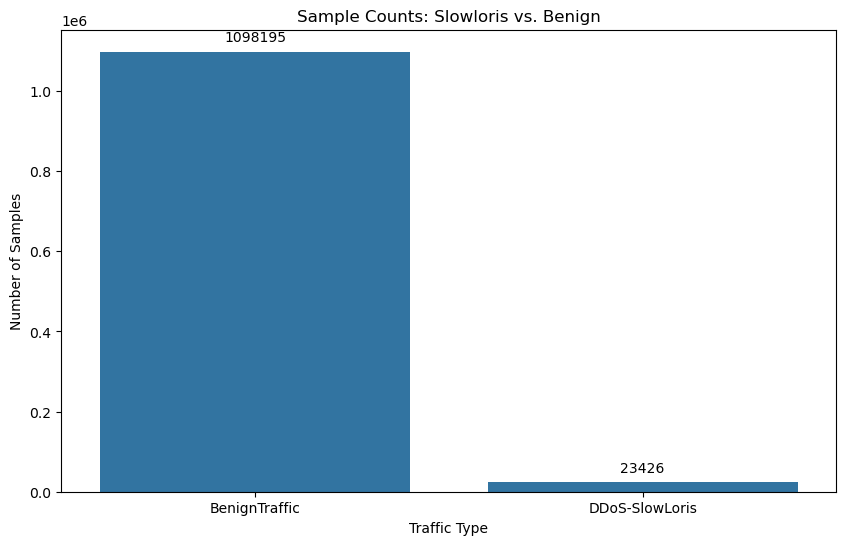

In [15]:
# Bar Chart — Sample Counts with value labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="label", y="count", data=summary_df)
plt.title("Sample Counts: Slowloris vs. Benign")
plt.xlabel("Traffic Type")
plt.ylabel("Number of Samples")

# Annotate each bar with its integer count
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f"{height}",
                (p.get_x() + p.get_width() / 2, height),
                ha="center", va="bottom",
                xytext=(0, 5), textcoords="offset points")

plt.show()

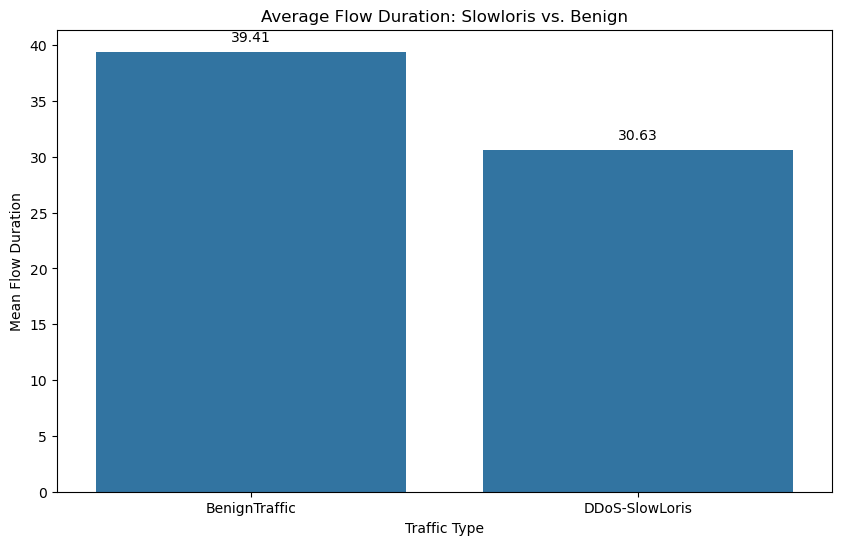

In [16]:
# Bar Chart — Mean Flow Duration with value labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="label", y="flow_duration_mean", data=summary_df)
plt.title("Average Flow Duration: Slowloris vs. Benign")
plt.xlabel("Traffic Type")
plt.ylabel("Mean Flow Duration")

# Annotate each bar with its mean (two decimals)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width() / 2, height),
                ha="center", va="bottom",
                xytext=(0, 5), textcoords="offset points")

plt.show()

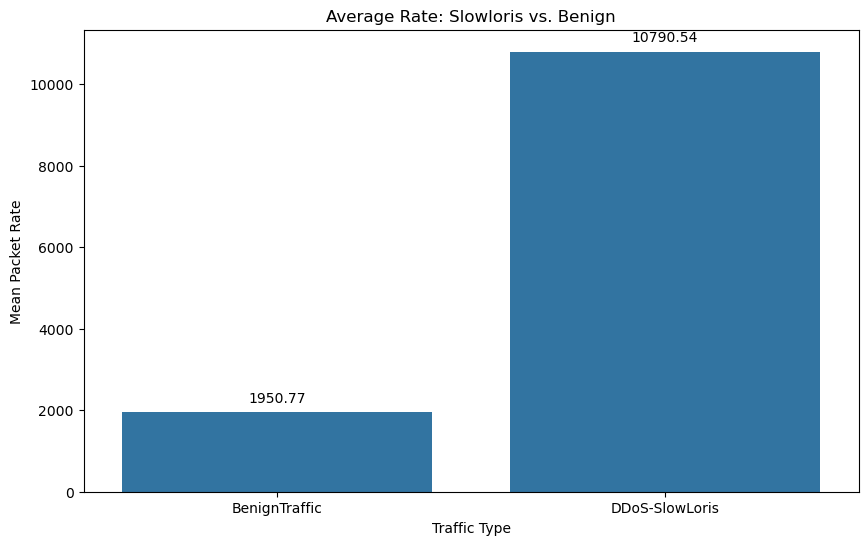

In [17]:
# Bar Chart — Mean Packet Rate with value labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="label", y="rate_mean", data=summary_df)
plt.title("Average Rate: Slowloris vs. Benign")
plt.xlabel("Traffic Type")
plt.ylabel("Mean Packet Rate")

# Annotate each bar with its mean rate (two decimals)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width() / 2, height),
                ha="center", va="bottom",
                xytext=(0, 5), textcoords="offset points")

plt.show()